## K2Processed

In [42]:
import pandas as pd

# Read the K2Processed.csv file into a DataFrame
k2_df = pd.read_csv('..\data\processed\k2Processed.csv')

# Normalize disposition labels
k2_df['disposition'] = k2_df['disposition'].replace({
    'CONFIRMED': 'CP',
    'FALSE POSITIVE': 'FP',
    'CANDIDATE': 'PC'
})

# Rename the disposition column to 'Status'
k2_df = k2_df.rename(columns={'disposition': 'Status'})

# Count the occurrences of each disposition type
disposition_counts = k2_df['Status'].value_counts()

# Display the counts for the requested dispositions
print("Counts for K2Processed.csv:")
print(disposition_counts[['CP', 'FP', 'PC']])

Counts for K2Processed.csv:
Status
CP    1019
FP      10
PC     192
Name: count, dtype: int64


## KeplerProcessed

In [43]:
import pandas as pd

# Read the KeplerProcessed.csv file into a DataFrame
kepler_df = pd.read_csv('..\data\processed\keplerProcessed.csv')

# Normalize disposition labels
kepler_df['koi_disposition'] = kepler_df['koi_disposition'].replace({
    'CONFIRMED': 'CP',
    'FALSE POSITIVE': 'FP',
    'CANDIDATE': 'PC'
})

# Rename the koi_disposition column to 'Status'
kepler_df = kepler_df.rename(columns={'koi_disposition': 'Status'})

# Count the occurrences of each value in the 'Status' column
koi_disposition_counts = kepler_df['Status'].value_counts()

# Display the counts
print("Counts for KeplerProcessed.csv:")
print(koi_disposition_counts)

Counts for KeplerProcessed.csv:
Status
FP    3735
CP    2731
PC    1356
Name: count, dtype: int64


## TOIProcessed

In [44]:
import pandas as pd

# Read the TOIProcessed.csv file into a DataFrame
toi_df = pd.read_csv('..\data\processed\TOIProcessed.csv')

# Rename the tfopwg_disp column to 'Status'
toi_df = toi_df.rename(columns={'tfopwg_disp': 'Status'})

# Count the occurrences of each value in the 'Status' column
tfopwg_disp_counts = toi_df['Status'].value_counts()

# Display the counts
print("Counts for TOIProcessed.csv:")
print(tfopwg_disp_counts)

Counts for TOIProcessed.csv:
Status
PC     3008
FP      812
CP      605
KP      365
APC     299
FA       55
Name: count, dtype: int64


In [45]:
# Combine the three dataframes
combined_df = pd.concat([k2_df, kepler_df, toi_df], ignore_index=True)

# Display the first few rows and the info of the combined dataframe to verify
print("Combined DataFrame:")
display(combined_df.head())
print("\nInfo of the combined DataFrame:")
combined_df.info()

Combined DataFrame:


,pl_name,hostname,default_flag,Status,disp_refname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,...,pl_trandeperr2,pl_insol,pl_eqt,st_tmag,st_tmagerr1,st_tmagerr2,st_dist,st_disterr1,st_disterr2,toi_created
0,BD+20 594 b,BD+20 594,0.0,CP,Espinoza et al. 2016,1.0,1.0,Transit,2016.0,K2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BD+20 594 b,BD+20 594,0.0,CP,Espinoza et al. 2016,1.0,1.0,Transit,2016.0,K2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BD+20 594 b,BD+20 594,1.0,CP,Espinoza et al. 2016,1.0,1.0,Transit,2016.0,K2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EPIC 201111557.01,EPIC 201111557,1.0,PC,Livingston et al. 2018,1.0,0.0,Transit,2018.0,K2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EPIC 201127519.01,EPIC 201127519,1.0,PC,Livingston et al. 2018,1.0,0.0,Transit,2018.0,K2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Info of the combined DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14190 entries, 0 to 14189
Columns: 124 entries, pl_name to toi_created
dtypes: float64(105), object(19)
memory usage: 13.4+ MB


In [46]:
# Save the combined dataframe to a CSV file
combined_df.to_csv('..\data\processed\Trifuerza.csv', index=False)

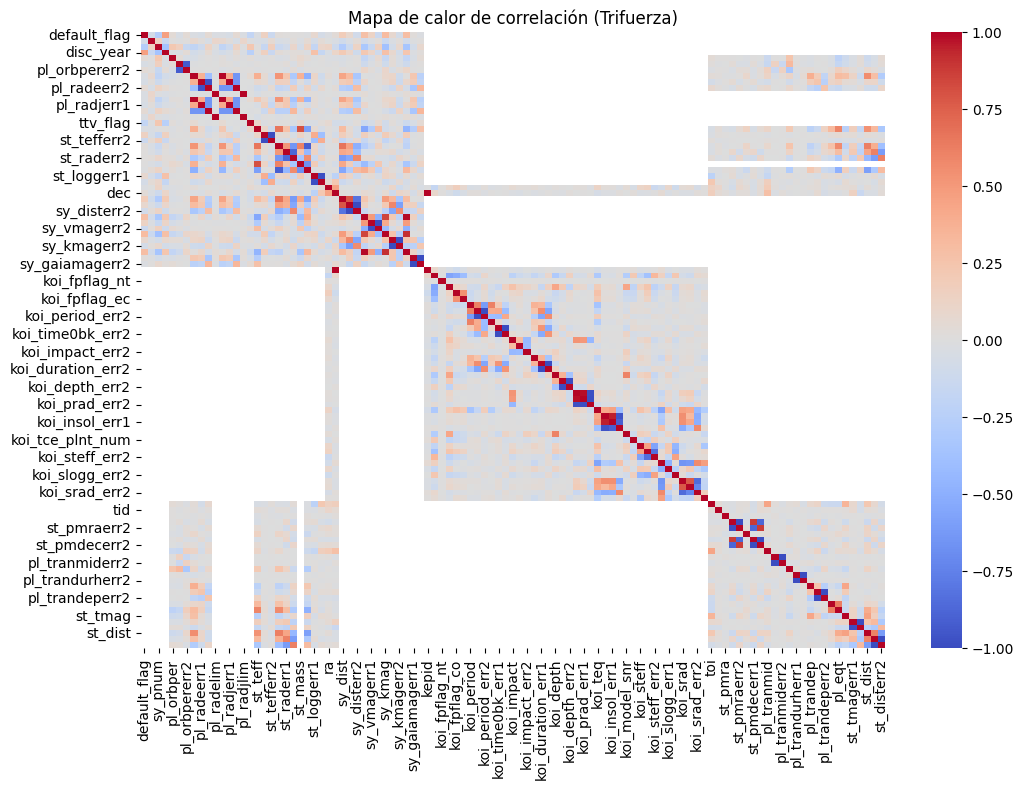

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona solo las columnas numéricas para la correlación
numeric_cols = combined_df.select_dtypes(include='number')

# Calcula la matriz de correlación
corr_matrix = numeric_cols.corr()

# Muestra el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación (Trifuerza)')
plt.show()

In [48]:
# Elimina el 50% de las filas que contienen valores nulos en kepler_df
num_rows_to_drop = int(kepler_df.isnull().any(axis=1).sum() * 0.5)
rows_with_nan = kepler_df[kepler_df.isnull().any(axis=1)].index[:num_rows_to_drop]
kepler_df = kepler_df.drop(index=rows_with_nan).reset_index(drop=True)

# Mostrar el número de filas después de eliminar
print(f"Filas restantes en kepler_df: {len(kepler_df)}")

Filas restantes en kepler_df: 5268


In [49]:
from sklearn.impute import SimpleImputer

# Imputar valores faltantes en kepler_df

# Separar columnas numéricas y categóricas
num_cols = kepler_df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = kepler_df.select_dtypes(include=['object']).columns

# Imputar numéricas con la media
imputer_num = SimpleImputer(strategy='mean')
kepler_df[num_cols] = imputer_num.fit_transform(kepler_df[num_cols])

# Imputar categóricas con la moda
imputer_cat = SimpleImputer(strategy='most_frequent')
kepler_df[cat_cols] = imputer_cat.fit_transform(kepler_df[cat_cols])

# Verificar que no queden valores faltantes
print("Valores faltantes restantes por columna:")
print(kepler_df.isnull().sum())

Valores faltantes restantes por columna:
kepid                0
kepoi_name           0
kepler_name          0
Status               0
koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad        

In [50]:
# Identificar columnas categóricas en kepler_df
categorical_cols = kepler_df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Columnas categóricas:", categorical_cols)

# Aplicar one-hot encoding a las columnas categóricas
kepler_df_encoded = pd.get_dummies(kepler_df, columns=categorical_cols, drop_first=True)

# Mostrar las primeras filas del dataframe codificado
kepler_df_encoded.head()

Columnas categóricas: ['kepoi_name', 'kepler_name', 'Status', 'koi_pdisposition', 'koi_tce_delivname']


,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,kepler_name_Kepler-994 b,kepler_name_Kepler-995 b,kepler_name_Kepler-996 b,kepler_name_Kepler-997 b,kepler_name_Kepler-998 b,kepler_name_Kepler-999 b,Status_FP,Status_PC,koi_pdisposition_FALSE POSITIVE,koi_tce_delivname_q1_q17_dr25_tce
0,10797460.0,1.000,0.0,0.0,0.0,0.0,9.488036,0.000028,-0.000028,170.53875,...,False,False,False,False,False,False,False,False,False,True
1,10797460.0,0.969,0.0,0.0,0.0,0.0,54.418383,0.000248,-0.000248,162.51384,...,False,False,False,False,False,False,False,False,False,True
2,10854555.0,1.000,0.0,0.0,0.0,0.0,2.525592,0.000004,-0.000004,171.59555,...,False,False,False,False,False,False,False,False,False,True
3,10872983.0,1.000,0.0,0.0,0.0,0.0,11.094321,0.000020,-0.000020,171.20116,...,False,False,False,False,False,False,False,False,False,True
4,10872983.0,1.000,0.0,0.0,0.0,0.0,4.134435,0.000010,-0.000010,172.97937,...,False,False,False,False,False,False,False,False,False,True


In [51]:
from sklearn.preprocessing import StandardScaler

# Identificar columnas numéricas en kepler_df_encoded
numeric_cols_encoded = kepler_df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Crear instancia de StandardScaler
scaler_encoded = StandardScaler()

# Ajustar y transformar las columnas numéricas
kepler_df_encoded[numeric_cols_encoded] = scaler_encoded.fit_transform(kepler_df_encoded[numeric_cols_encoded])

# Mostrar el encabezado del DataFrame actualizado para verificar la escala
kepler_df_encoded.head()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,kepler_name_Kepler-994 b,kepler_name_Kepler-995 b,kepler_name_Kepler-996 b,kepler_name_Kepler-997 b,kepler_name_Kepler-998 b,kepler_name_Kepler-999 b,Status_FP,Status_PC,koi_pdisposition_FALSE POSITIVE,koi_tce_delivname_q1_q17_dr25_tce
0,1.110053,0.887848,-0.029192,-0.521686,-0.38758,-0.312982,-0.337177,-0.194711,0.194711,0.222984,...,False,False,False,False,False,False,False,False,False,True
1,1.110053,0.821892,-0.029192,-0.521686,-0.38758,-0.312982,0.152219,-0.156410,0.156410,0.084470,...,False,False,False,False,False,False,False,False,False,True
2,1.131986,0.887848,-0.029192,-0.521686,-0.38758,-0.312982,-0.413015,-0.198892,0.198892,0.241225,...,False,False,False,False,False,False,False,False,False,True
3,1.139064,0.887848,-0.029192,-0.521686,-0.38758,-0.312982,-0.319681,-0.195998,0.195998,0.234418,...,False,False,False,False,False,False,False,False,False,True
4,1.139064,0.887848,-0.029192,-0.521686,-0.38758,-0.312982,-0.395491,-0.197720,0.197720,0.265111,...,False,False,False,False,False,False,False,False,False,True


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Limpieza de datos
# Eliminamos filas con valores nulos en las columnas más importantes para el modelado
cols_to_use = [
    'koi_period', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq',
    'koi_insol', 'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag', 'Status'
]
df_clean = kepler_df[cols_to_use].dropna()

# 2. Normalización y codificación
X = df_clean.drop('Status', axis=1)
y = df_clean['Status']

# Codificamos la variable objetivo
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalizamos las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 4. Modelado y entrenamiento
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 5. Evaluación
y_pred = clf.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

          CP       0.92      0.94      0.93       543
          FP       0.85      0.87      0.86       402
          PC       0.54      0.45      0.49       109

    accuracy                           0.86      1054
   macro avg       0.77      0.75      0.76      1054
weighted avg       0.85      0.86      0.86      1054

Matriz de confusión:
[[508  20  15]
 [ 27 349  26]
 [ 19  41  49]]
